# 파이토치로 구현하는 신경망

## 신경망 모델 구현하기

In [13]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# 학습 데이터 생성을 위해 sklearn, numpy를 import해준다.
# matplotlib는 학습 데이터의 분포, 패턴 시각화를 위한 라이브러리

In [21]:
# 2차원 벡터
n_dim = 2

# make_blobs () 함수가 만들어내는 레이블 데이터는 각 데이터 한 점, 한 점이 몇 번째 클러스터에 속해 있는지 알려주는 인덱스로, 
# 본 예제에서는 총 4개의 클러스터(0, 1, 2, 3)을 만들어 각 데이터는 모두 라벨링 되어 있다. 

# 학습을 위한 데이터셋 (80개)
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

print(x_train)
print(len(x_train))
print('============')
print(y_train)

# 평가를 위한 데이터셋 (20개)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

[[ 0.89205725 -1.39532394]
 [ 0.97405757 -1.38700782]
 [-0.69115861  0.76700728]
 [ 0.92940007 -1.83442   ]
 [-1.09170989 -1.45913516]
 [ 0.91977069 -1.01278658]
 [ 0.96439348 -1.08654621]
 [ 1.51013511  0.87231278]
 [ 1.26173271  1.15799134]
 [ 0.84073604 -1.15485095]
 [ 0.81138313 -1.41645782]
 [ 0.02306508  1.20622619]
 [ 0.78877335  1.42791068]
 [-1.27988502  0.97906966]
 [ 0.58224986  0.78365496]
 [-0.97934058 -0.76479849]
 [ 1.11245815  1.1174094 ]
 [-1.15096391 -0.92339486]
 [ 0.99926999  0.75826309]
 [ 0.93549591  1.51395158]
 [ 0.7346495   1.02764158]
 [-1.51712613 -1.53675837]
 [ 0.97817879  0.65435469]
 [-0.77180436  0.67271332]
 [-0.6941464  -0.45515403]
 [-1.09524484 -1.0103633 ]
 [ 0.73312092  0.98192142]
 [ 1.2424305   0.82439076]
 [-0.55085218  0.90487672]
 [-0.99244392  0.89889856]
 [-1.2982659  -0.98880707]
 [-1.0042368   1.23191454]
 [ 1.23350499 -1.45879308]
 [ 0.89209528  1.2548559 ]
 [-1.42417108  0.93073696]
 [ 1.36436094 -1.23812783]
 [-1.22951725  0.58555686]
 

In [22]:
# 상단에 구현한 4개의 라벨을 2개의 라벨로 합쳐서 간단하게 0, 1로만 구분할 수 있도록 추가적인 함수를 구현
# 0 or 1일 경우엔 0 / 2 or 3일 경우엔 1로 맵핑
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)


print(x_train)
print(len(x_train))
print('============')
print(y_train)

[[ 0.89205725 -1.39532394]
 [ 0.97405757 -1.38700782]
 [-0.69115861  0.76700728]
 [ 0.92940007 -1.83442   ]
 [-1.09170989 -1.45913516]
 [ 0.91977069 -1.01278658]
 [ 0.96439348 -1.08654621]
 [ 1.51013511  0.87231278]
 [ 1.26173271  1.15799134]
 [ 0.84073604 -1.15485095]
 [ 0.81138313 -1.41645782]
 [ 0.02306508  1.20622619]
 [ 0.78877335  1.42791068]
 [-1.27988502  0.97906966]
 [ 0.58224986  0.78365496]
 [-0.97934058 -0.76479849]
 [ 1.11245815  1.1174094 ]
 [-1.15096391 -0.92339486]
 [ 0.99926999  0.75826309]
 [ 0.93549591  1.51395158]
 [ 0.7346495   1.02764158]
 [-1.51712613 -1.53675837]
 [ 0.97817879  0.65435469]
 [-0.77180436  0.67271332]
 [-0.6941464  -0.45515403]
 [-1.09524484 -1.0103633 ]
 [ 0.73312092  0.98192142]
 [ 1.2424305   0.82439076]
 [-0.55085218  0.90487672]
 [-0.99244392  0.89889856]
 [-1.2982659  -0.98880707]
 [-1.0042368   1.23191454]
 [ 1.23350499 -1.45879308]
 [ 0.89209528  1.2548559 ]
 [-1.42417108  0.93073696]
 [ 1.36436094 -1.23812783]
 [-1.22951725  0.58555686]
 

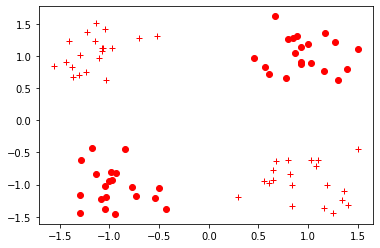

In [16]:
# 시각화 (0인 데이터는 점, 1인 데이터는 십자가)
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [23]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [24]:
class NeuralNet(torch.nn.Module): # 일반적으로 신경망 모듈을 상속받는 파이썬 클래스로 정의
        def __init__(self, input_size, hidden_size): # 객체 생성시 자동 호출되는 init함수
            super(NeuralNet, self).__init__() # NeuralNet 클래스가 nn.Module의 속성을 갖고 초기화된다.
            self.input_size = input_size # 입력 데이터의 차원
            self.hidden_size  = hidden_size # Linear layer 내 은닉 유닛 개수
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) # torch.nn.Linear는 bias와 행렬곱을 포함한 연산을 지원할 수 있는 Linear layer를 반환한다.
            self.relu = torch.nn.ReLU() # activation function ReLU 선언
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid() # acitivation function Sigmoid 선언
            
        def forward(self, input_tensor):# 네트워크를 거칠 때 사용되는 함수
            # linear 1 : [input_size, hidden_size] 크기의 가중치(weight)를 행렬곱 하고, bias를 더해 [1, hidden_size 꼴의 텐서를 반환한다]
            linear1 = self.linear_1(input_tensor)
            
            # relu함수를 적용 --> 입력 값이 0보다 작으면 0 / 0 이상이면 그대로 출력
            relu = self.relu(linear1)
            
            # Relu를 거친 텐서는 linear_2를 거치면서 [1, 1]사이즈로 변환되고,
            linear2 = self.linear_2(relu)
            
            # sigmoid함수를 거쳐서 0~1사이의 값을 반환
            # ==> 최종적으로 이 데이터가 0 or 1 중 어느쪽에 더 가까운지 판별할 수 있음
            output = self.sigmoid(linear2)
            return output

In [25]:
#Input size를 2/ hidden_size를 5로 설정한 네트워크 객체 선언
model = NeuralNet(2, 5)

learning_rate = 0.03
# Binary Cross Entropy Loss 함수를 Loss function으로 적용
criterion = torch.nn.BCELoss()

# 전체 학습 데이터를 총 몇번 모델에 입력할지(몇 번 반복학습할지)
epochs = 2000
# Optimizer로 SGD(Stochastic Gradient Descent) 설정
# step()함수를 부를 때마다 가중치를 학습률만큼 갱신하므로, 
# model.parameter()함수로 추출한 모델 내의 weight, learning rate을 입력
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [26]:
# 아무런 학습을 진행하지 않았을 때의 성능 테스트
model.eval()
# x_test(모델의 결과값)와 y_test(실제 레이블 값) 간의 차원을 동일하게 하기 위해서 squeeze()함수 사용
test_loss_before = criterion(model(x_test).squeeze(), y_test)

# Tensor 형태의 test_loss_before값을 스칼라 형태로 출력하기 위해 .item()함수 호출
print('Before Training, test loss is {}'.format(test_loss_before.item()))
# 100번 중 73번은 틀린다는 얘기

Before Training, test loss is 0.6585330367088318


오차값이 0.73 이 나왔습니다. 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방합니다.
자, 이제 드디어 인공신경망을 학습시켜 퍼포먼스를 향상시켜 보겠습니다.

In [27]:
for epoch in range(epochs):# Epoch만큼 도는 함수
    # Train 함수 호출(네트워크의 모드 전환 단계)
    model.train()
    
    # Epoch마다 새로운 gradient 계산을 위해 gradient를 0으로 설정
    optimizer.zero_grad()

    # 실제 학습 데이터를 입력하여, 결과값을 게산
    # 이 때 수행되는 함수는 앞의 NeuralNet 클래스 내에서 정의한 forward함수
    # nn.Module 이 알아서 forward를 호출해줌
    train_output = model(x_train)

    # x_test(모델의 결과값)와 y_test(실제 레이블 값) 간의 차원을 동일하게 하기 위해서 squeeze()함수 사용
    train_loss = criterion(train_output.squeeze(), y_train)

    # 100 Epoch마다 학습이 잘 되가는지 체크하기 위한 함수
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    
    # 오차함수를 gradient로 미분해서 오차가 최소가 되는 방향을 구하고
    train_loss.backward()
    # 그 방향으로 모델을 학습률만큼 이동 ==> backpropagation 수행하는 과정
    optimizer.step()

Train loss at 0 is 0.654840350151062
Train loss at 100 is 0.5820306539535522
Train loss at 200 is 0.47394293546676636
Train loss at 300 is 0.3669072091579437
Train loss at 400 is 0.28525468707084656
Train loss at 500 is 0.22933140397071838
Train loss at 600 is 0.1904139667749405
Train loss at 700 is 0.161863774061203
Train loss at 800 is 0.14014708995819092
Train loss at 900 is 0.12314338982105255
Train loss at 1000 is 0.10952923446893692
Train loss at 1100 is 0.09831728786230087
Train loss at 1200 is 0.08893394470214844
Train loss at 1300 is 0.08103473484516144
Train loss at 1400 is 0.07430198043584824
Train loss at 1500 is 0.0685398280620575
Train loss at 1600 is 0.0635688453912735
Train loss at 1700 is 0.05923731252551079
Train loss at 1800 is 0.055432237684726715
Train loss at 1900 is 0.05206543207168579


In [28]:
# 학습 후의 테스트
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.05564504861831665


학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인 하실 수 있습니다.
지금까지 인공신경망을 구현하고 학습시켜 보았습니다.
이제 학습된 모델을 .pt 파일로 저장해 보겠습니다.

In [29]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.1622, -1.6365],
        [ 1.9154,  1.2786],
        [ 1.0080, -1.0352],
        [ 1.1280, -1.1008],
        [-0.8459, -1.2165]])), ('linear_1.bias', tensor([-0.1329, -0.0336, -0.0621,  0.1036, -0.0732])), ('linear_2.weight', tensor([[-1.8473, -2.2366,  1.2595,  1.3941, -1.2376]])), ('linear_2.bias', tensor([2.1635]))])


`save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성됩니다. 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능합니다.

In [30]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.8969229459762573
